<a href="https://colab.research.google.com/github/takunton/ds/blob/main/work/ds_ml/web/lesson31_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データロード
df = sns.load_dataset('titanic')
# 欠損値drop
df = df.dropna()
# 特徴量
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
# 質的変数をダミー変数化
X = pd.get_dummies(X, drop_first=True)
# 目的変数
y = df['survived']

In [3]:
# モデル作成
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# ランダムフォレスト
rf_model = RandomForestClassifier(random_state=0, ccp_alpha=0.02)
# 決定木
dt_model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)

In [9]:
# k-fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

# ランダムフォレストスコア
rf_scores = cross_val_score(rf_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 決定木スコア
dt_scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

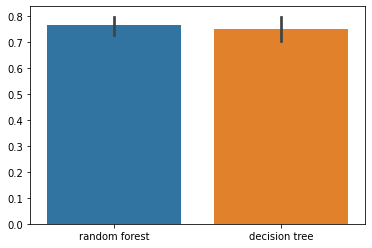

In [10]:
# スコアグラフ
score_df = pd.DataFrame({'random forest': rf_scores, 'decision tree': dt_scores})
sns.barplot(data=score_df)

In [12]:
# pvalue >= 0.05のため有意差なし
from scipy import stats
stats.ttest_rel(score_df['random forest'], score_df['decision tree'])

Ttest_relResult(statistic=0.9517151387117377, pvalue=0.35738431321019015)

<BarContainer object of 22 artists>

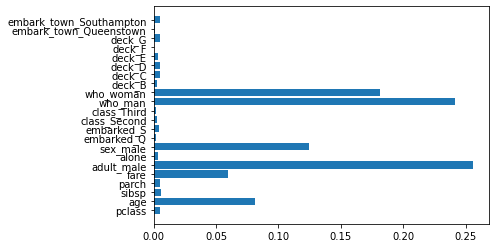

In [16]:
rf_model.fit(X, y)
plt.barh(X.columns, rf_model.feature_importances_)